In [1]:
import seaborn as sns
import time
import datetime
import os

In [4]:
# Common external libraries
import pandas as pd
import numpy as np
import sklearn 
import requests


In [5]:
#Visualization libraries
%matplotlib inline
import matplotlib.pyplot as plt


In [6]:
# Setting plot appearance
# See here for more options: https://matplotlib.org/users/customizing.html

%config InlineBackend.figure_format='retina'
sns.set() # Revert to matplotlib defaults
plt.rcParams['figure.figsize'] = (9, 6)
plt.rcParams['axes.labelpad'] = 10
sns.set_style("darkgrid")

# Loading the Data

In [7]:
from sklearn import datasets

In [8]:
boston =datasets.load_boston()
type(boston)

sklearn.utils.Bunch

In [9]:
from sklearn.utils import Bunch


In [11]:
#What fields are in the dictionary
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [12]:
print(boston["DESCR"])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [13]:
#check the data feature
boston["data"]

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [14]:
#Check the samples on data 
boston["data"].shape


(506, 13)

In [16]:
boston["feature_names"]

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [20]:
#Make a dataframe to load the data for few features
df =pd.DataFrame(
    data=boston["data"],columns=boston["feature_names"])

In [21]:
#still need to add target variable
boston["target"].shape

(506,)

In [22]:
df["MEDV"] =boston["target"]

In [23]:
y = df.MEDV.copy()
del df["MEDV"]
df = pd.concat((y,df),axis=1)

In [24]:
df.head()

,MEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,24.0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,21.6,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,34.7,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,33.4,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,36.2,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [25]:
df.dtypes

MEDV       float64
CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
dtype: object

In [26]:
#identify the Null values
df.isnull().sum()

MEDV       0
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

In [27]:
#Removing some columns
for col in ["ZN","NOX","RAD","PTRATIO","B"]:
    del df[col]

In [28]:
df.head()

,MEDV,CRIM,INDUS,CHAS,RM,AGE,DIS,TAX,LSTAT
0,24.0,0.00632,2.31,0.0,6.575,65.2,4.0900,296.0,4.98
1,21.6,0.02731,7.07,0.0,6.421,78.9,4.9671,242.0,9.14
2,34.7,0.02729,7.07,0.0,7.185,61.1,4.9671,242.0,4.03
3,33.4,0.03237,2.18,0.0,6.998,45.8,6.0622,222.0,2.94
4,36.2,0.06905,2.18,0.0,7.147,54.2,6.0622,222.0,5.33


# Data Exploration

In [31]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MEDV,506.0,22.532806,9.197104,5.00000,17.025000,21.20000,25.000000,50.0000
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000
LSTAT,506.0,12.653063,7.141062,1.73000,6.950000,11.36000,16.955000,37.9700


In [32]:
#Focus on these columns
cols =["RM","AGE","TAX","LSTAT","MEDV"]
df[cols].tail()

,RM,AGE,TAX,LSTAT,MEDV
501,6.593,69.1,273.0,9.67,22.4
502,6.120,76.7,273.0,9.08,20.6
503,6.976,91.0,273.0,5.64,23.9
504,6.794,89.3,273.0,6.48,22.0
505,6.030,80.8,273.0,7.88,11.9


In [33]:
# check the correlation
df[cols].corr()

,RM,AGE,TAX,LSTAT,MEDV
RM,1.000000,-0.240265,-0.292048,-0.613808,0.695360
AGE,-0.240265,1.000000,0.506456,0.602339,-0.376955
TAX,-0.292048,0.506456,1.000000,0.543993,-0.468536
LSTAT,-0.613808,0.602339,0.543993,1.000000,-0.737663
MEDV,0.695360,-0.376955,-0.468536,-0.737663,1.000000


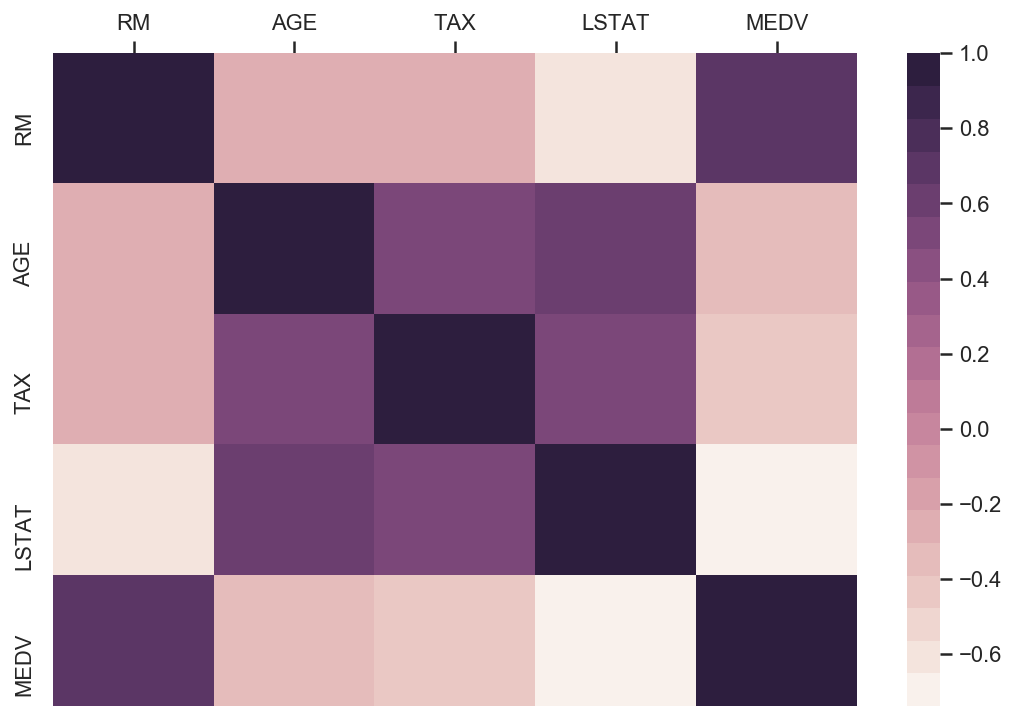

In [36]:
# set up plotting the environment
#Visualization libraries
ax = sns.heatmap(df[cols].corr(),cmap =sns.cubehelix_palette(20,light=0.95, dark=0.15),)
ax.xaxis.tick_top()


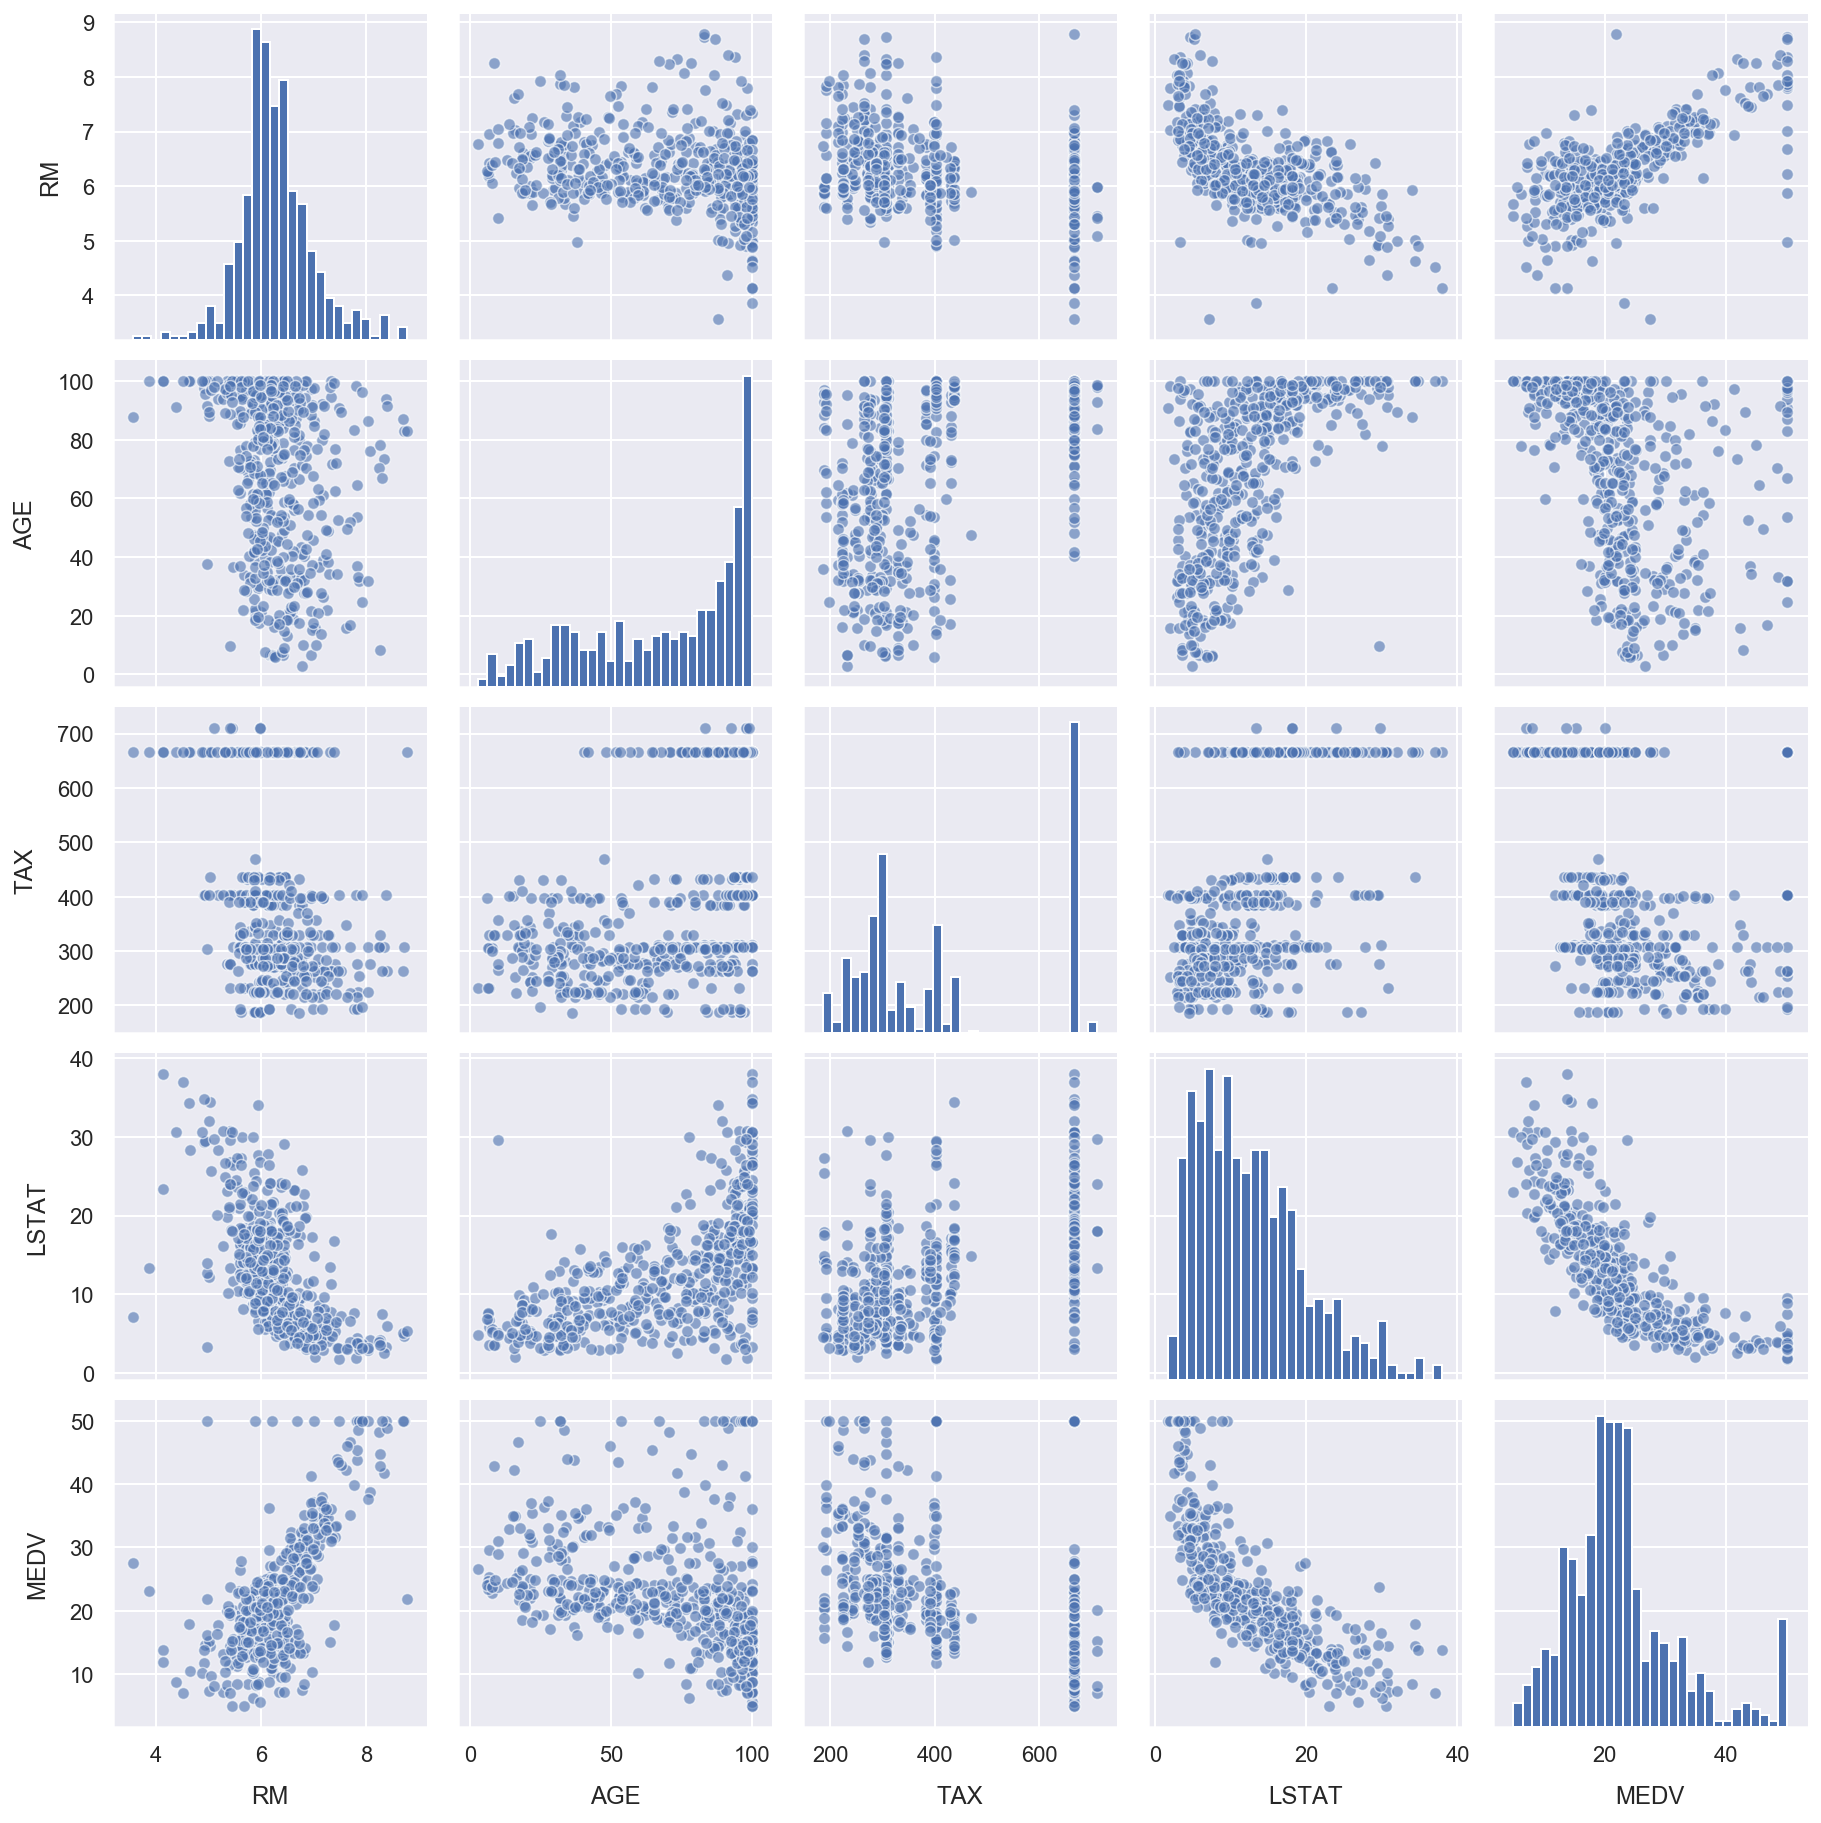

In [37]:
sns.pairplot(
df[cols],
    plot_kws={"alpha":0.6},
    diag_kws ={"bins":30}
)

# Introduction to predictive analytics
We are going to predict median house value(MEDV) using some features seen in the pairplot above. The line of best fit is calculated by minimazing the ordinary least squares error function which seaborn does automatically when we call regplot function. 

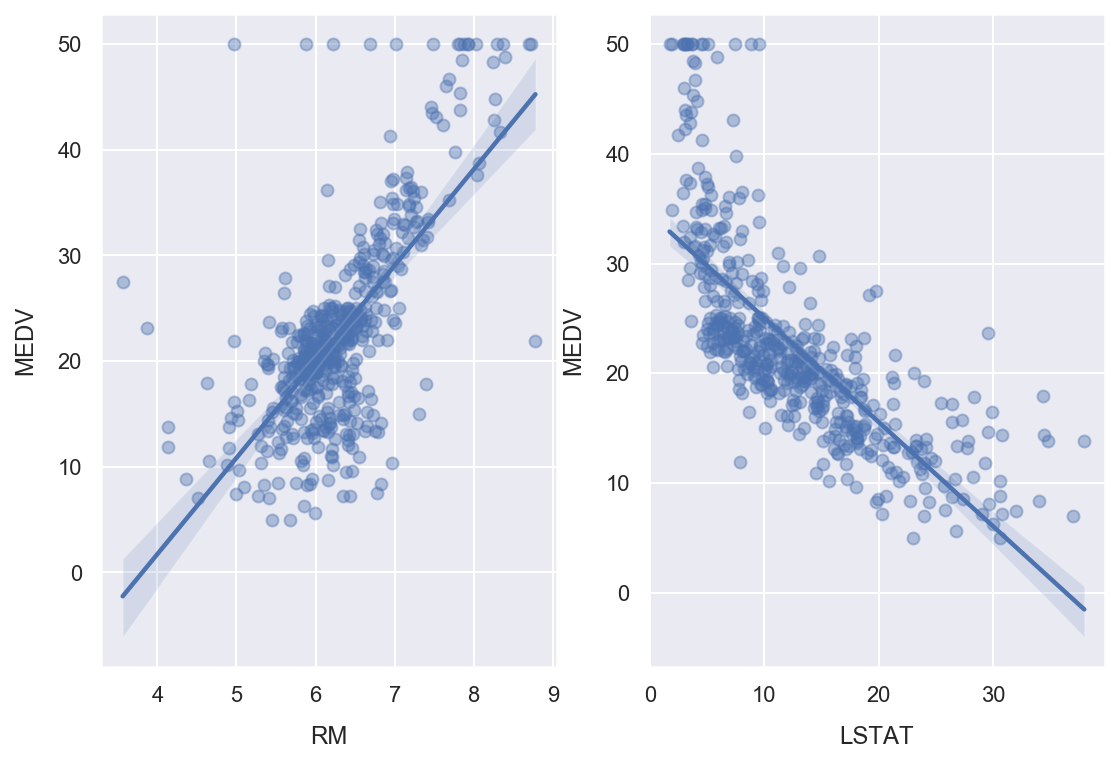

In [38]:
fiq,ax =plt.subplots(1,2)
sns.regplot(
    x="RM",
    y="MEDV",
    data=df,
    ax=ax[0], scatter_kws={"alpha": 0.4}
)

sns.regplot(
   x="LSTAT",
    y ="MEDV",
    data=df,
    ax=ax[1], scatter_kws={"alpha" :0.4}
    
)



(-25, 40)

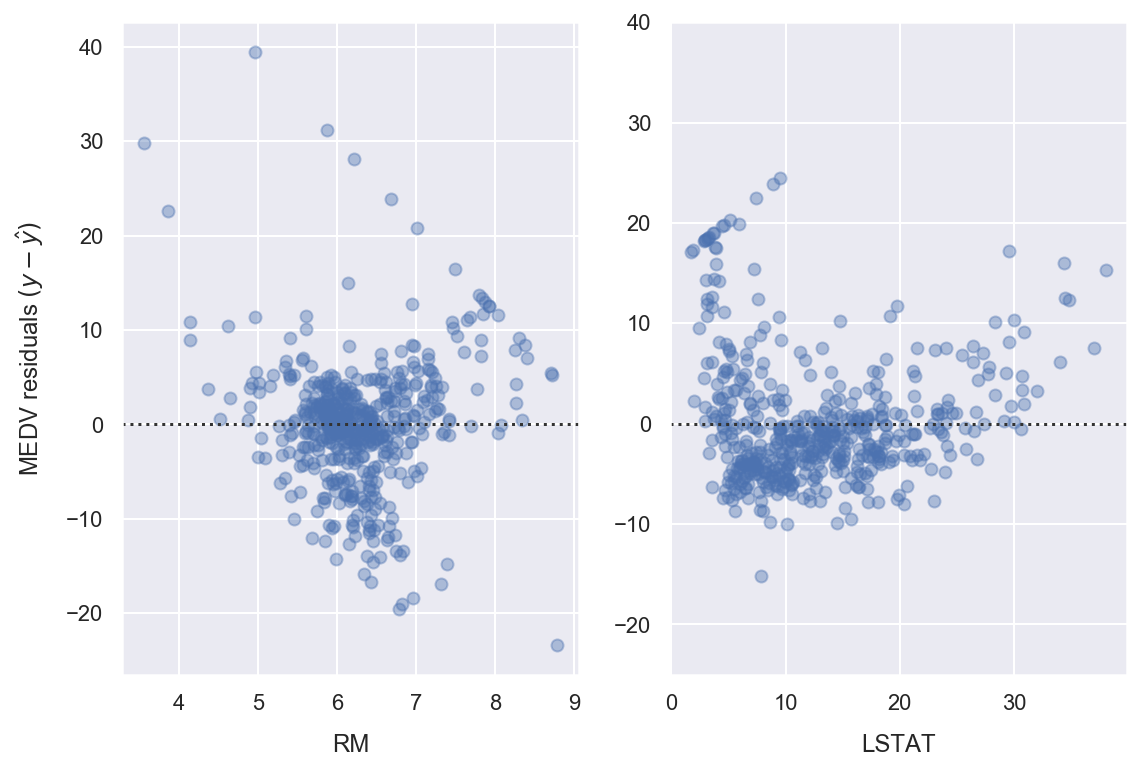

In [39]:
fig,ax =plt.subplots(1,2)
ax[0] =sns.residplot(
    x="RM",
    y="MEDV",
    data =df,
    ax=ax[0],scatter_kws={"alpha":0.4}
)

ax[0].set_ylabel("MEDV residuals $(y-\hat{y})$")
ax[1] =sns.residplot(
    x = "LSTAT",
    y ="MEDV",
    data =df,
    ax=ax[1],scatter_kws={"alpha": 0.4}
)
ax[1].set_ylabel(" ")
plt.ylim(-25,40)
    

Each point on these residual plots is the difference between the observed
value(y) and the linear model predicton(yhat). Residual greater than zero are data points that would be underestiemated by the model ant residual less than zero are data points that would be overestimated by the model. Patterns in these plots can indicate suboptimal modelling. 

In [45]:
# MSE of linear models to calculate the line of best fit

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

def get_mse(df, feature,target ="MEDV"):
    y = df[target].values
    x = df[feature].values.reshape(-1,1)
    print("{} ~ {}".format(target, feature))
    
    lm =LinearRegression()
    lm.fit(x,y)
    
    msg =(
        "model : y= {:.3f} +{:.3f}x"
        .format(lm.intercept_,lm.coef_[0])
    )
    print(msg)
    
    #predict and determine MSE
    
    y_pred =lm.predict(x)
    error = mean_squared_error(y,y_pred)
    print("mse = {:.2f}".format(error))
    print()

In [42]:
get_mse(df,"RM")
get_mse(df,"LSTAT")


MEDV ~ RM
model : y= -34.671 +9.102x
mse = 43.60

MEDV ~ LSTAT
model : y= 34.554 +-0.950x
mse = 38.48



By comparing the MSE, it happens that the error is slighly lower for the LSTAT than RM by looking at the scatter plots. 

# Categorical feature segmentation analysis
Often, we will find patterns by segmenting the continious variable and categorical fields. for instances, imagine we are evaluating the return on investment from an ad campaign. The data you have access to contains measures of some calculated **return on investment (ROI)** metric. Since we dont have any categorical fields in Boston Housing dataset, we are creating one by discretizing a continious field. This involves binning the data into low, medium, and high categories. 


(0, 100.0)

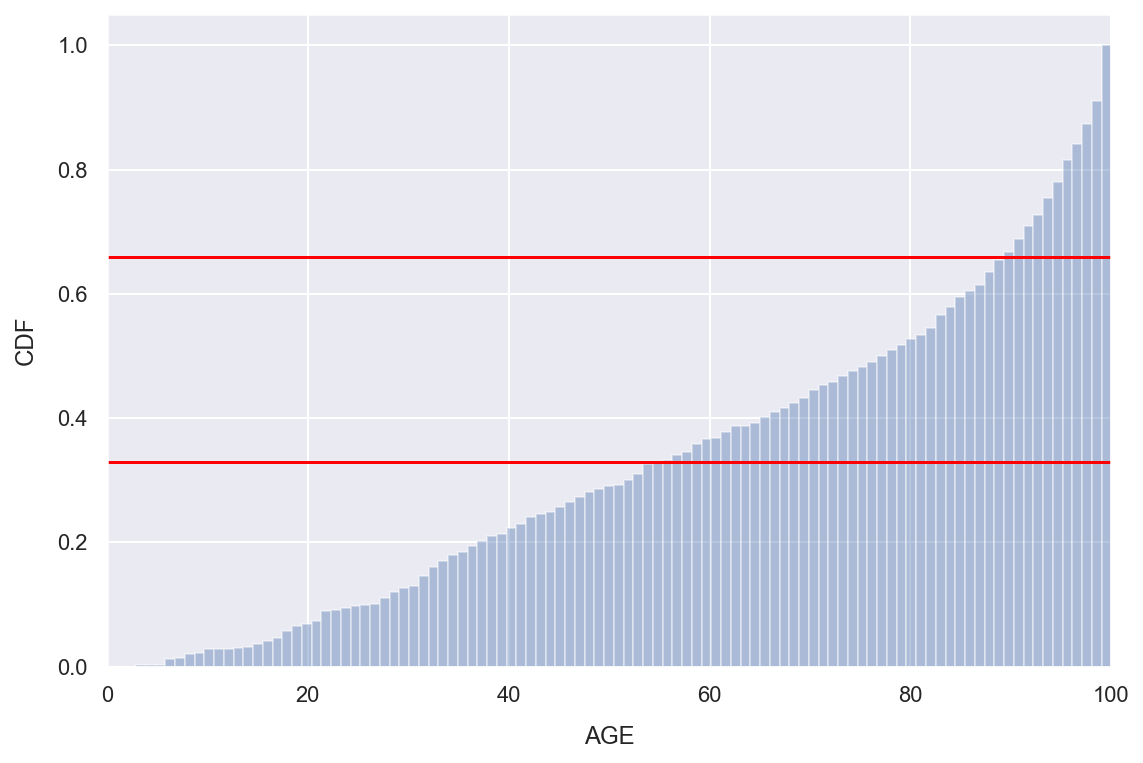

In [44]:
#Plot cumulative distribution to find places to split data
sns.distplot(
    df.AGE.values,
    bins =100,
    hist_kws={"cumulative" :True},
    kde_kws ={"lw" : 0}
)

plt.xlabel("AGE")
plt.ylabel("CDF")
plt.axhline(0.33,color="red")
plt.axhline(0.66,color ="red")
plt.xlim(0,df.AGE.max())

we use sns.displot to plot the distribution and set hist_kws={"cumulative" : True} in order to calculate and chart the cumulative distribution. Based on the graph, there are few samples with low AGE distribution value, whereas there are far more very large AGE. The red lines indicate 1/3 and 2/3 points in the cumulative distribution. We cans ee that 33% of the samples have the value of AGE less than 55, and 33% of the samples have the va;ue of AGE greater than 90. In other words, a third of the housing communities have fewer than 55% of their homes built prior to 1940. These would be considered relatively new communities.  At the end of the spectrum, another third of the house communities have over 90 % of their homes built prior to 1940. These would be considered very old. That is why we will split the red categories into Relatively new , Old, and Very Old. 

In [46]:
#we are using apply function to apply a function into the new column

def get_age_category(x):
    if x < 50 :
        age = "Relatively New"
    elif 50<=x<= 85:
        age = "Relatively Old"
    else:
        age ="Very Old"
    return age
df["AGE_category"] = df.AGE.apply(get_age_category)

In [48]:
df.groupby("AGE_category").size()

AGE_category
Relatively New    147
Relatively Old    149
Very Old          210
dtype: int64

We can see that two class sizes are nearly equal and that the very old group is about 40% larger. Now, let's see the target variable is distributed when segmented by new feature in AGE_category

(0, 55)

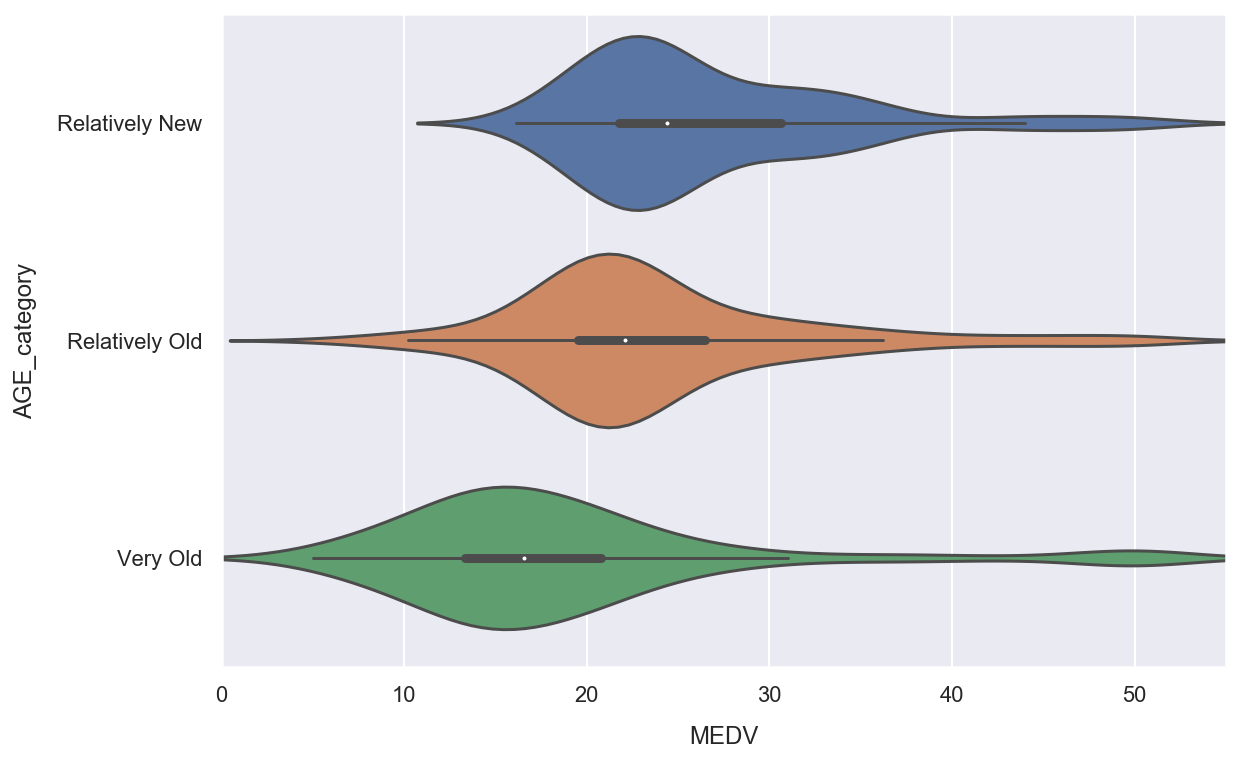

In [54]:
sns.violinplot(
   x = "MEDV",
    y = "AGE_category",
    data = df,
    order =["Relatively New", "Relatively Old", "Very Old"]
    
)
plt.xlim(0,55)


we can see that the Very Old group contains the lowest median house value records and has relatively large width, whereas the other groups are more tightly centered on their average. The young group is skewed to the high end, which is evident from enlarged right half and the position of the white dot in the thick black line within the body of the distribution. The white dot represents the mean and the thic black spans roughly 50% of the population 

(0, 55)

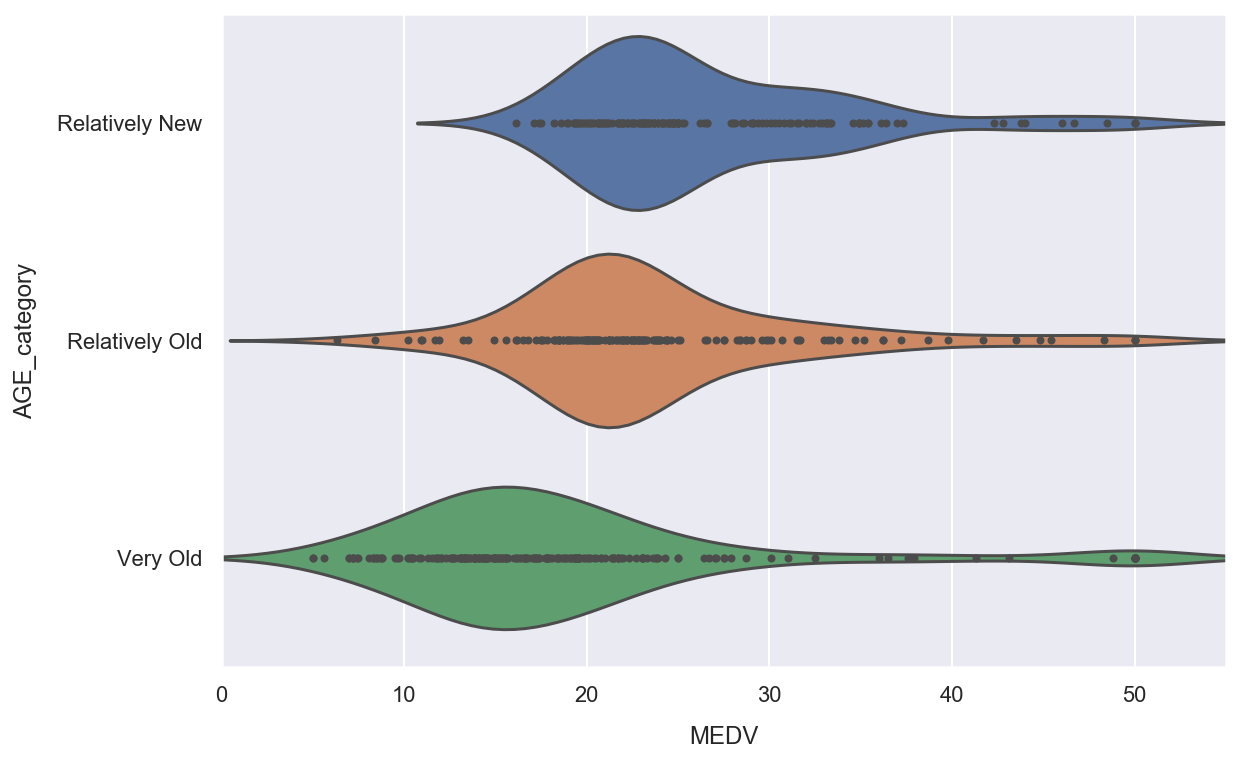

In [55]:
sns.violinplot(
   x = "MEDV",
    y = "AGE_category",
    data = df,
    inner ="point",
    order =["Relatively New", "Relatively Old", "Very Old"]
    
)
plt.xlim(0,55)

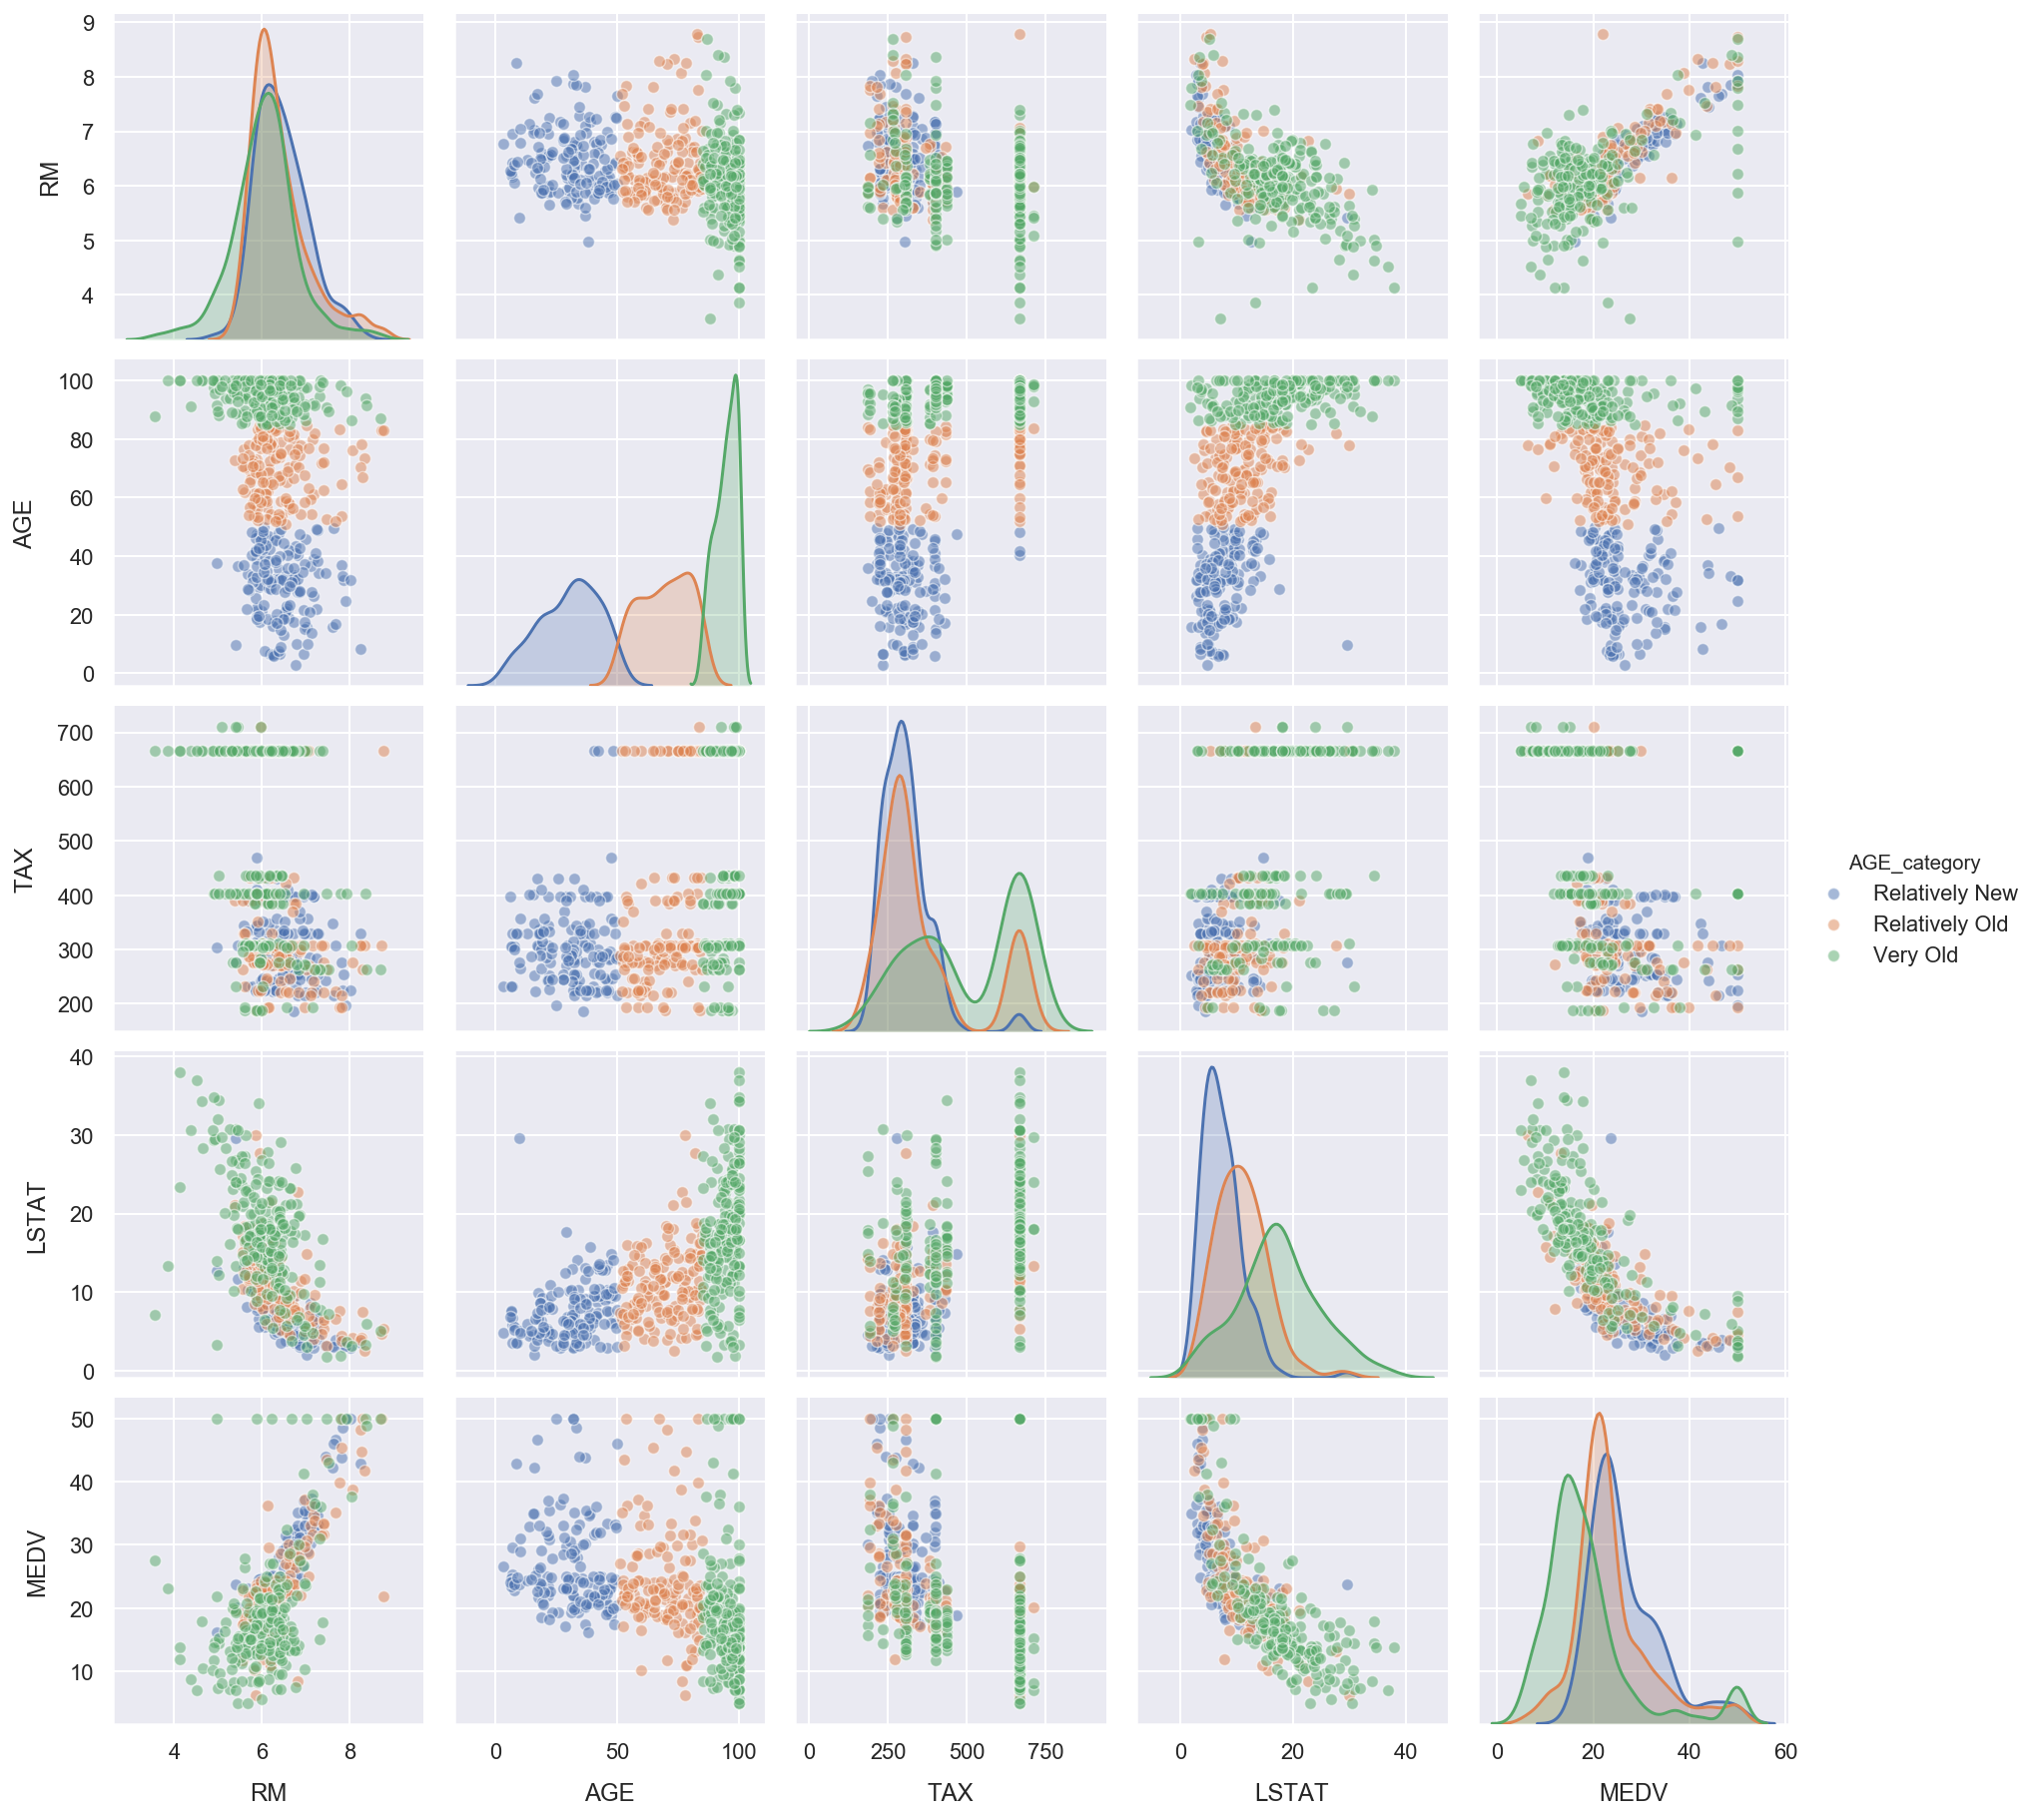

In [56]:
#reconstruct the pairplot with AGE category
cols =["RM", "AGE", "TAX", "LSTAT","MEDV", "AGE_category"]
sns.pairplot(
    df[cols],
    hue= "AGE_category",
    hue_order =["Relatively New", "Relatively Old", "Very Old"],
    plot_kws = {"alpha" : 0.5}
)

looking at the histograms, we can see that the underlying distributions of each segment appera for RM and TAX. The LSTAT distributions, on the other hand, look more distinct. 

(-5, 40)

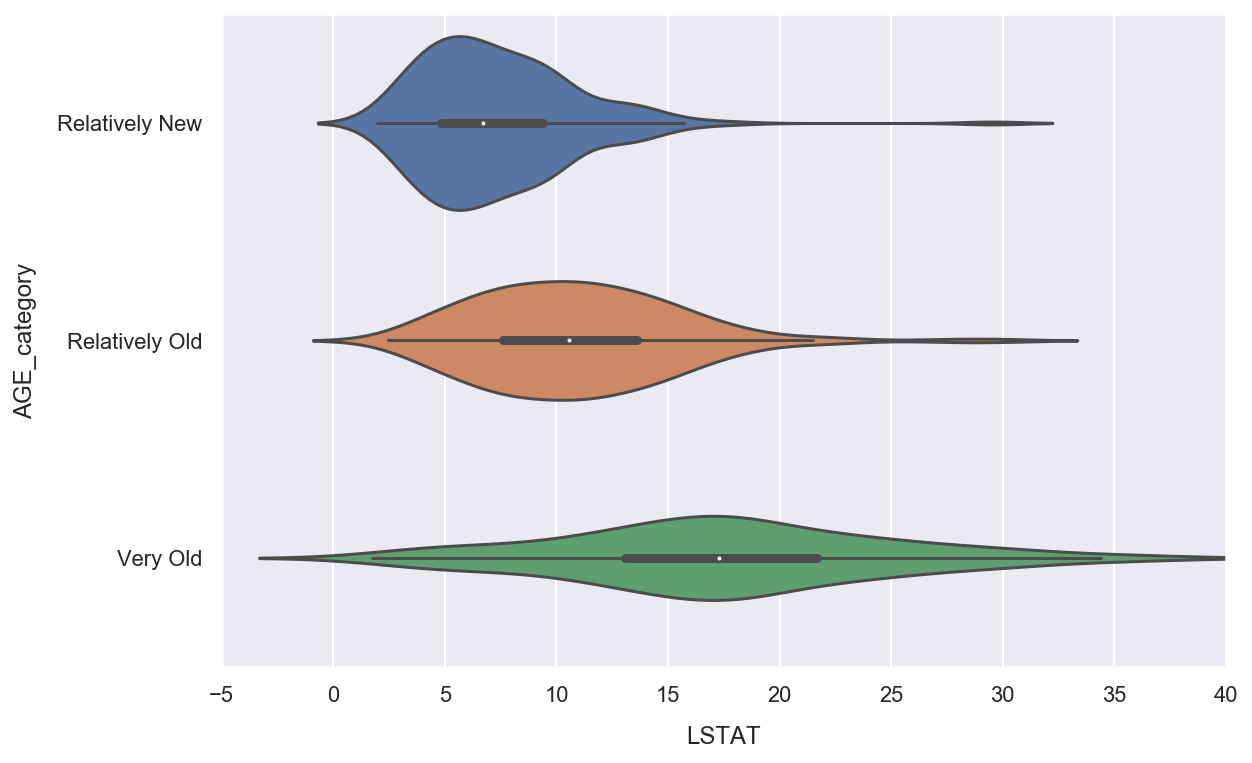

In [57]:
sns.violinplot(
    x='LSTAT',
    y='AGE_category',
    data=df,
    order=['Relatively New', 'Relatively Old', 'Very Old'],
)
plt.xlim(-5,40)

unlike the MEDV violin plot, where each distribution had roughly with the same width, here you can see the width increasing along with AGE. Communities with primarily old houses contain anywhere from very few to many lower class residents, whereas Relatively New Communities are much more likely to be predominantly higher  class with over 95 % of samples having less lower class percentages than very Old communities. This makes sense, because Relatively New neighborhoods would be more expensive. 

# Building a Third-Order Polynomial Model

In [58]:
#Exercise for building a third-order polynomial model
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
boston =datasets.load_boston()

df = pd.DataFrame(
    data = boston["data"],
    columns =boston["feature_names"],
)
df["MEDV"] = boston["target"]

In [63]:
# pull out dependent feature and target variable from df

y = df["MEDV"].values
x = df["LSTAT"].values.reshape(-1,1)

In [64]:
#verify what x looks like
x[:3]

array([[4.98],
       [9.14],
       [4.03]])

In [66]:
#transform x into polynomial features 
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 3, include_bias = True, interaction_only =False,
                         order ="C")


In [67]:
x_poly = poly.fit_transform(x)

In [68]:
#verify x_poly 
x_poly[:3]

array([[  1.      ,   4.98    ,  24.8004  , 123.505992],
       [  1.      ,   9.14    ,  83.5396  , 763.551944],
       [  1.      ,   4.03    ,  16.2409  ,  65.450827]])

In [69]:
from sklearn.linear_model import LinearRegression
clf = LinearRegression(fit_intercept=False)
clf.fit(x_poly,y)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None, normalize=False)

In [70]:
#Extract the coefficient
x_0, x_1, x_2, x_3 = clf.coef_
msg = (
    'model: y = {:.3f} + {:.3f}x + {:.3f}x^2 + {:.3f}x^3'
    .format(x_0, x_1, x_2, x_3)
)
print(msg)

model: y = 48.650 + -3.866x + 0.149x^2 + -0.002x^3


In [71]:
#determine the predicted values for each sample
y_pred = clf.predict(x_poly)
resid_MEDV = y- y_pred
resid_MEDV[:10]

array([-8.84025736, -2.61360313, -0.65577837, -5.11949581,  4.23191217,
       -3.56387056,  3.16728909, 12.00336372,  4.03348935,  2.87915437])

In [72]:
from sklearn.metrics import mean_squared_error
error =mean_squared_error(y,y_pred)

In [73]:
print("mse = {:.2f}".format(error))


mse = 28.88


The MSE is 28,88 which is significantly less for polynomial model compared to the linear model(38.5). This error metric can be converted into an average error in dollar by thaing the square root

Text(0, 0.5, 'MEDV')

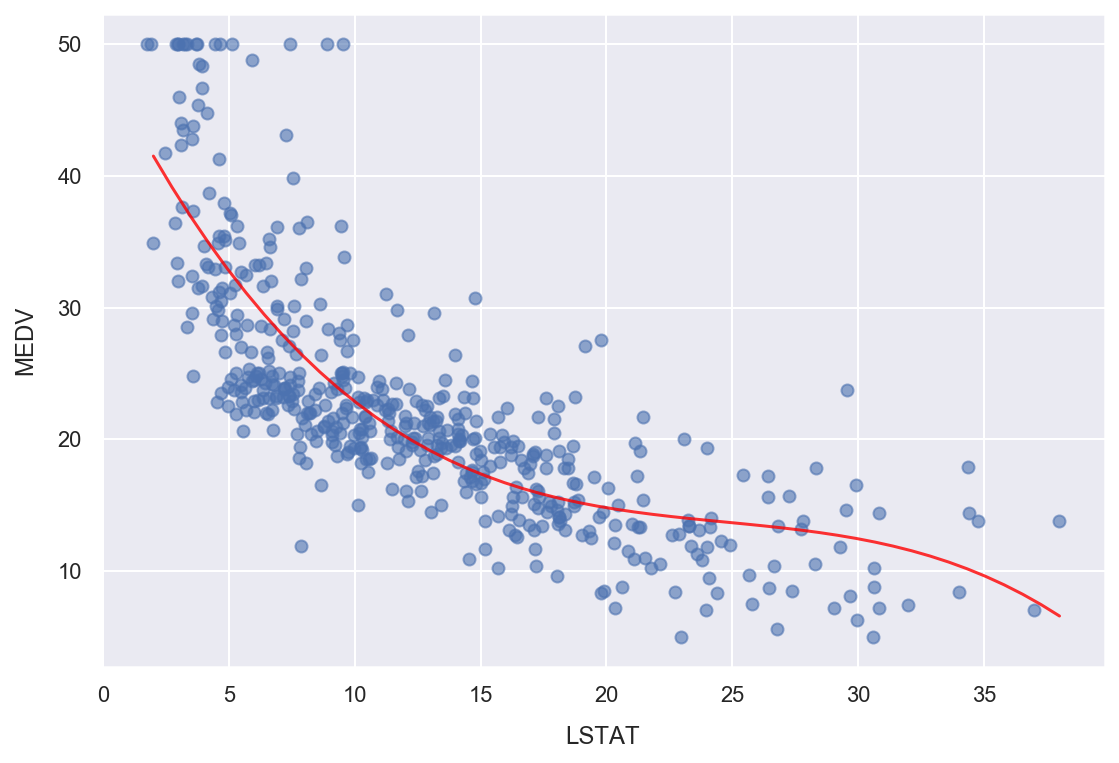

In [74]:
fig, ax = plt.subplots()
# Plot the samples
ax.scatter(x.flatten(), y, alpha=0.6)
# Plot the polynomial model
x_ = np.linspace(2, 38, 50).reshape(-1, 1)
x_poly = poly.fit_transform(x_)
y_ = clf.predict(x_poly)
ax.plot(x_, y_, color='red', alpha=0.8)
ax.set_xlabel('LSTAT')
ax.set_ylabel('MEDV')

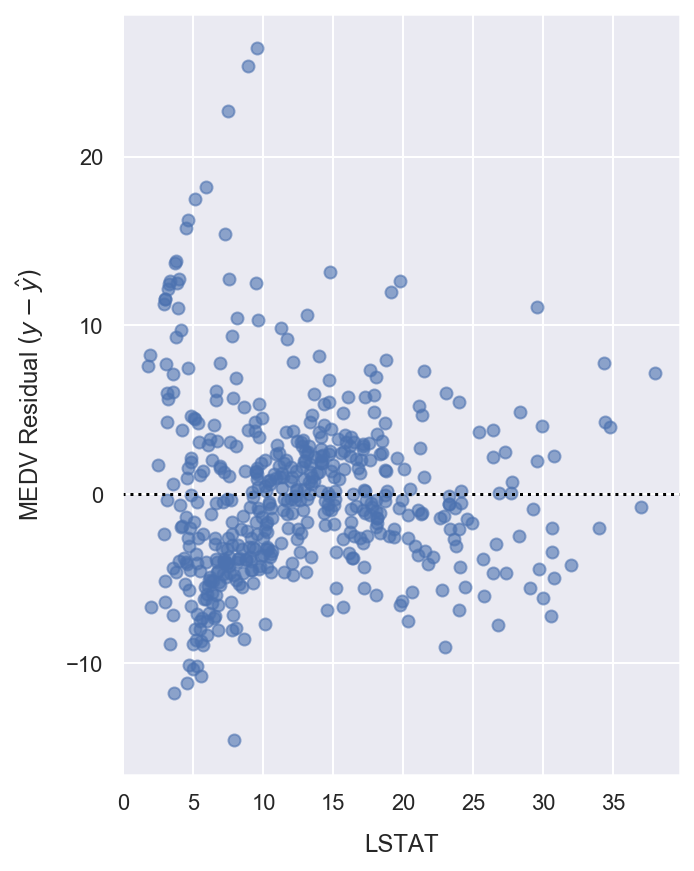

In [75]:
fig, ax = plt.subplots(figsize=(5, 7))
ax.scatter(x, resid_MEDV, alpha=0.6)
ax.set_xlabel('LSTAT')
ax.set_ylabel('MEDV Residual $(y-\hat{y})$')
plt.axhline(0, color='black', ls='dotted')

Compared to tthe linear model LSTAT residual plot, the polynomial model residuals appear to be more closely clustered around y - ŷ = 0 where y is the sample MEDV and ŷ  is the predicted value. 